K=1 -> Accuracy=0.9861
K=2 -> Accuracy=0.9861
K=3 -> Accuracy=0.9861
K=4 -> Accuracy=0.9833
K=5 -> Accuracy=0.9833
K=6 -> Accuracy=0.9806
K=7 -> Accuracy=0.9833
K=8 -> Accuracy=0.9778
K=9 -> Accuracy=0.9806
K=10 -> Accuracy=0.9778
K=11 -> Accuracy=0.9778
K=12 -> Accuracy=0.9750
K=13 -> Accuracy=0.9750
K=14 -> Accuracy=0.9778
K=15 -> Accuracy=0.9750
K=16 -> Accuracy=0.9778
K=17 -> Accuracy=0.9694
K=18 -> Accuracy=0.9694
K=19 -> Accuracy=0.9667
K=20 -> Accuracy=0.9667

✅ Best K found: 1 with Accuracy=0.9861


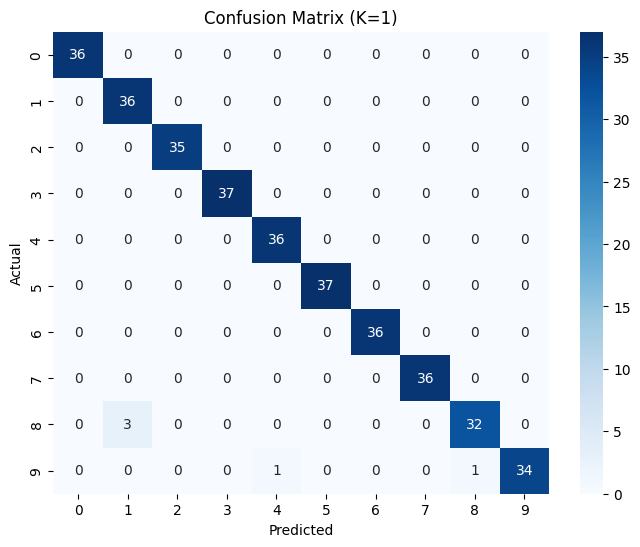


📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [3]:
#  KNN Classification on Digits Dataset (0–9)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

digits = load_digits()
X = digits.data
y = digits.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Try Different K values
best_k = 1
best_acc = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} -> Accuracy={acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\n Best K found: {best_k} with Accuracy={best_acc:.4f}")


#  Train final model with best K

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)


#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()


# Step 6: Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))
